# HW 13 - Introduction to SciPy
ULAB - Physics and Astronomy Division
Due **Sunday, February 16th, 2025 at 11:59 PM** on Gradescope.

------

## 0 Academic Integrity

Please type the following message in the cell below as a comment. Sign with your name.

------

**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------


In [1]:
#I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material. - Joshua Lee

## 1 Simulate a Pendulum
A simple pendulum follows the equation:

$$
\frac{\text{d}^2\theta}{\text{d}t^2} + \frac{g}{L}\sin(\theta) = 0
$$

The goal is to **numerically solve the equation** and compare it to the small-angle approximation.

***Small-Angle Approximation:** a mathematical simplification used in physics when dealing with osciallatory motion, particularly for pendulums and trigonometric funcitons in general.*

Import `numpy`, `matplotlib` and `solve_ivp` in the cell below.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Define the acceleration of gravity $g$ (two significant digits is fine) and the length of the pendulum $l$ in the cell below to **1 meter**.

In [17]:
g = 9.81
L = 1.0

Write a **function** called `pendulum` that contain the arguments `t` and `y`. Write out the differential equation. Follow the structure Brianna gave in lecture, it's very similar.

*Hint: The variable domega/dt should be equal to -(g / L) * np.sin(theta)*. I'll let you take care of the rest. 

In [19]:
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g/L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

Give you equation some initial conditions. Run the cell below.

In [21]:
theta_0 = np.radians(10) # Convert 10 degrees to radians
omega_0 = 0.0 # Initial angular velocity

Solve the differential equation using `solve_ivp`. Set the simulation time to **10 seconds** and the time for evaluation to **10 steps**.

In [23]:
t_span = (0,19)
t_eval = np.linspace(0, 10, 500)
sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval=t_eval)

Extrac the **theta** values (`sol.y`) and the **time** values (`sol.t`).

In [27]:
theta_values = sol.y[0]
time_values = sol.t

Calculate the theoretical period (aka small-angle approximation).

*Hint: Use `2 * np.pi * np.sqrt(L / g)`.*

In [ ]:
# Your code here

Print out the theoretical period (small-angle approximation) to **two** significant digits.

In [ ]:
# Your code here

Estimate the period from simulation by finding the first zero crossing. Run the cell below.

In [ ]:
zero_crossings = np.where(np.diff(np.sign(theta_values)))[0]
if len(zero_crossings) >= 2:
    T_numerical = 2 * (time_values[zero_crossings[1]] - time_values[zero_crossings[0]])
else:
    T_numerical = None

Plot the results in the cell below. Add a **horizontal** line at `x=0`, give it an `x_label` of **Time (s)**, a `y_label` of **Theta (radians)** and a title.

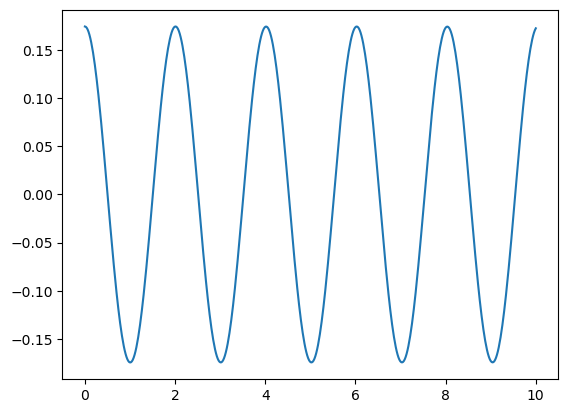

In [29]:
plt.plot(time_values, theta_values, label="Numerical Solution")

Print out the numerical period (what you calculated with scipy) to **four** significant digits.

In [ ]:
# Your code here

Compare the results between the small-angle approximation and numerical calculation. How well does the approximation match the numerical result?

In [ ]:
# Your comment here

## 2 Using Curve_Fit with Covid-19 Data
Import `pandas` in the cell below.

In [ ]:
# Your code here

Run the cell below. If that doesn't work, then just **paste** the link into a web browser and it should automatically download. Then you can put the `.csv` file in the same directory as this notebook.

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

With the `pandas` function `read_csv`, import the data in the cell below as a dataframe `df`.

In [ ]:
# Your code here

Select **United States** as the country and make a new data frame called `df_country` with only this information.

In [ ]:
# Your code here

From your `df_country` dataframe, extract only the relevant columns: **"date"** and **"total_cases"**. 

*Hint: Use `.dropna()` to get rid of the other data.*

In your `df_country` dataframe, add a new column called **"days since start"** and covert the data to numerical days.

*Hint: You can just take the length of your dataframe (`range(len(df_country))`).*

In [ ]:
# Your code here

Print the first few rows of your `df_country` dataframe.

In [ ]:
# Your code here

In the cell below, import `curve_fit`. Make sure to have `numpy` imported in this notebook as well.

In [ ]:
# Your code here

### Some background:
At the beginning of an outbreak, the number of cases follows an exponential growth model:

$$
C(t) = C_0 e^{rt}
$$

where
* $C(t)$ = number of cases at time $t$.
* $C_0$ = initial number of cases.
* $r$ = growth rate.
* $t$ = time in days.

Write a **function** called `exponential_growth` that takes in arguments `t`, `C_0` and `r`. Return the function given above.

In [ ]:
# Your code here

Make a new variable called `days` and another new variable called `cases`. To the `days` variable give it the first 30 rows (your column **"days_since_start"**) and to the `cases` variable give it the first 30 rows (your column **"total_cases"**).

In [ ]:
# Your code here

With `curve_fit` fit the model. Give it the argument `p0 = [1, 0.1]`.

In [ ]:
# Your code here

Extract the best-fit parameters from `popt`. Call them `C0_fit` and `r_fit`.

In [ ]:
# Your code here

Print your variables `C0_fit` with **two** significant digits. Print your variables `r_fit` with **four** significant digits.

In [ ]:
# Your code here

Make sure to have `matplotlib` imported. Make a variable called `future_days` give it a numpy range from `0` to `60`. We want to predict up to 60 days.

In [ ]:
# Your code here

Make a variable called `predicted_cases` set it equal to your function `exponential_growth` with inputs being `future_days` and your `curve_fit` outputs. 

*Hint: You will want to use `*popt` as your `curve_fit` input.*

In [ ]:
# Your code here 

**Scater** the variable `cases` as a function of `days`. **Plot** the variable `future_days` as a function of `predicted_cases`. 

Don't forget a label for your x-axis, y-axis, title and legend.

In [ ]:
# Your code here

How well does your exponential model fit the actual COVID-19 data? 

In [ ]:
# Your comment here

Make another plot but this time to **90 days**.

In [ ]:
# Your code here

What does your model predict the number of cases to be at 87 days? Print in the cell below.

In [ ]:
# Your code here

## 3 Seaborn
Use Seaborn to visualize your data, NOT matplotlib. 
1) Go to this website and **pick a dataset that interest you**: https://github.com/mwaskom/seaborn-data
2) Go to this website for documentation: https://seaborn.pydata.org/index.html
3) Import seaborn data (*Hint: You can use the function `sns.load dataset()`. For example, `sns.load dataset('planets')`.*
4) Make a cool plot!
5) With `scipy` add a model to your data. (This can be a different plot.)

In [ ]:
# Your code here

On it's own branch, submit this notebook to Gradescope! 